In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import sys
import os
import numpy as np

# Add the project root to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(project_root)

import dagology as dag

np.random.seed(99)

In [2]:
%matplotlib inline

In [3]:
N = 5
D = 2
R = dag.minkowski_interval(N, D)

In [4]:
DAG = dag.CausalSetGraph()
G = DAG.generate_graph(R, weighted=True)
G_TR = nx.transitive_reduction(G)
path = DAG.traverse_path(dag.greedy_shortest_path, 'forward')
print(path)
print("Path weight: %.3f" % DAG.get_path_weight(path[::1]))

[0, 1, 2, 3, 4]
Path weight: 0.349


In [5]:
pos = {i:G.nodes[i]['position'][::-1] for i in G.nodes()}
labels = {i: f"{i}\n\n" + ", ".join(f"{t:.3f}" for t in G.nodes[i]['position']) for i in range(N)}

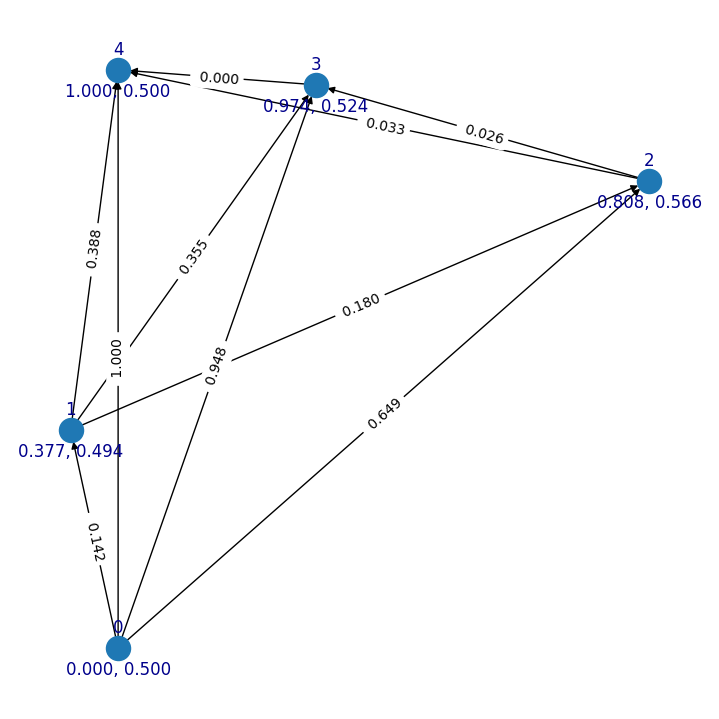

In [6]:
plt.figure(figsize=(7,7))

nx.draw(G, pos=pos)
nx.draw_networkx_labels(G,pos,labels, font_color='darkblue')
edge_labels = {i:f"{nx.get_edge_attributes(G,'weight')[i]: .3f}" for i in G.edges}
nx.draw_networkx_edge_labels(G_TR, pos, edge_labels=edge_labels, font_color='black')

plt.axis('off')
plt.savefig('../figures/minkowski_example.svg')
plt.show()

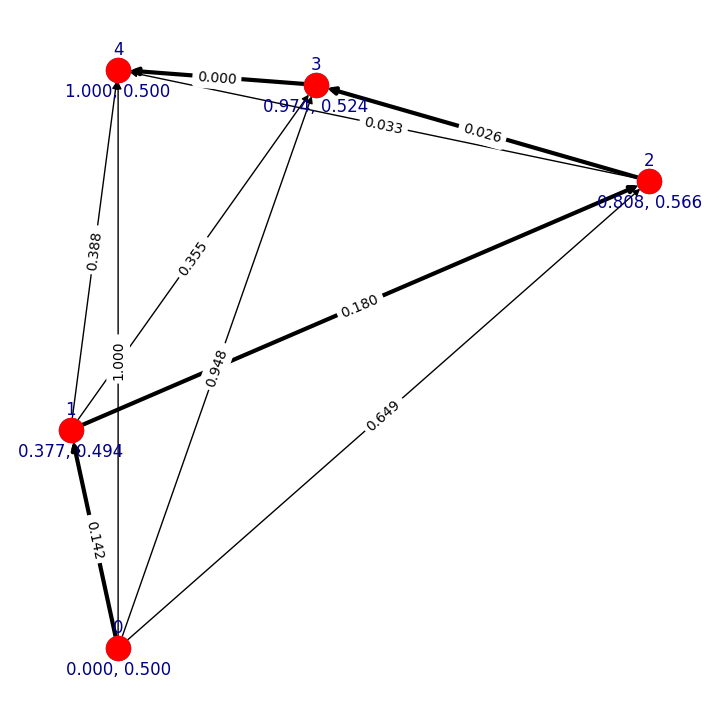

In [7]:
plt.figure(figsize=(7,7))

# Filter the edges based on whether they are in the path
edges_in_path = [(path[i], path[i+1]) for i in range(len(path)-1)]

# Create a subgraph containing only the edges in the path
G_path = nx.Graph()
G_path.add_nodes_from(G.nodes)
G_path.add_edges_from(edges_in_path)

# Draw the subgraph containing only the edges in the path
nx.draw(G, pos=pos)
# Make the edges in the path thicker
nx.draw_networkx_edges(G, pos, edgelist=[(path[i], path[i+1]) for i in range(len(path)-1)], width=3)
nx.draw_networkx_labels(G_path, pos, labels, font_color='darkblue')
edge_labels = {i: f"{nx.get_edge_attributes(G,'weight')[i]:.3f}" for i in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black')
# Change the color of nodes in the path to red
nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='red')
plt.axis('off')
plt.savefig('../figures/minkowski_greedy_example.svg')
plt.show()